<a href="https://colab.research.google.com/github/Alex112525/Neural-networks-fundamentals/blob/main/Binary_classification_(IMDB_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import regularizers
from keras import models, layers, optimizers

#Import Dataset

The IMDb dataset is a dataset related to movie reviews and sentiment analysis. It consists of 25,000 highly polar movie reviews for training and 25,000 for testing, split evenly into positive and negative reviews. The data has been pre-processed, where words have been encoded as integers, and the labels are binary (positive/negative). This dataset is widely used for sentiment analysis tasks and is often used as a benchmark for evaluating the performance of different machine learning models.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data.shape

(25000,)

In [ ]:
index_words = { key:value for value, key in imdb.get_word_index().items()}
index_words

In [ ]:
for i in train_data[2]:
  print(index_words.get(i-3), end=" ")

None this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had None working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how None this is to watch save yourself an hour a bit of your life 

The purpose of the function is to perform one-hot encoding of the sequences, which is a common preprocessing step in text classification and NLP tasks. The input parameter dim represents the size of the vocabulary or the number of unique words in the text.

In [ ]:
def vectorize(sequence, dim=10000):
  results = np.zeros((len(sequence), dim))
  for i, seq in enumerate(sequence):
    results[i, seq] = 1
  return results

In [ ]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

#Build model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape = (10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

Binary cross entropy is a loss function used in binary classification problems in machine learning. It measures the distance between the true binary labels and the predicted probability values for the class with higher predicted probability.

RMSprop works by dividing the learning rate for each weight by a running average of the magnitudes of recent gradient updates for that weight. This helps to reduce the oscillations that can arise when using gradient descent, and can result in faster convergence.

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

The validation_split is used to specify the fraction of the training data that should be used as validation data. 
The validation data is used to monitor the training process and evaluate the model performance. This argument is often used in a training/validation/testing data split, where a portion of the training data is set aside as validation data, and another portion is used as test data.

In [ ]:
Model = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_split=0.3)

Epoch 1/20
35/35 [==============================] - 1s 30ms/step - loss: 0.1095 - accuracy: 0.9639 - val_loss: 0.2437 - val_accuracy: 0.9133
Epoch 2/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0945 - accuracy: 0.9700 - val_loss: 0.2626 - val_accuracy: 0.9080
Epoch 3/20
35/35 [==============================] - 1s 18ms/step - loss: 0.0797 - accuracy: 0.9762 - val_loss: 0.3252 - val_accuracy: 0.8921
Epoch 4/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0693 - accuracy: 0.9800 - val_loss: 0.3125 - val_accuracy: 0.8964
Epoch 5/20
35/35 [==============================] - 1s 18ms/step - loss: 0.0584 - accuracy: 0.9840 - val_loss: 0.3346 - val_accuracy: 0.8943
Epoch 6/20
35/35 [==============================] - 1s 18ms/step - loss: 0.0486 - accuracy: 0.9875 - val_loss: 0.4068 - val_accuracy: 0.8837
Epoch 7/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0401 - accuracy: 0.9907 - val_loss: 0.3917 - val_accuracy: 0.8861
Epoch 8/20
35

#Results

In [ ]:
his_dic = Model.history

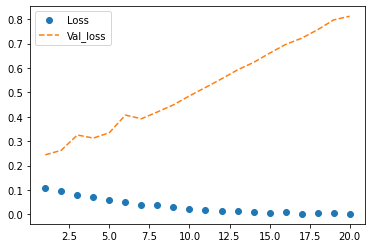

In [ ]:
epoch=range(1,21)
plt.plot(epoch, his_dic["loss"], "o", label="Loss")
plt.plot(epoch, his_dic["val_loss"], "--", label="Val_loss")
plt.legend()
plt.show()

#Techniques to solve overfitting

 **Less complex model**

A model with fewer neurons can help solve overfitting by reducing the capacity of the model. With a reduced capacity, the model is less likely to fit the noise in the training data and instead learn a more general representation of the underlying patterns in the data. 

Overfitting sometimes occurs when a model is too complex and fits the training data too well, resulting in poor performance on unseen data.

In [ ]:
less_model = models.Sequential()
less_model.add(layers.Dense(8, activation="relu", input_shape = (10000,)))
less_model.add(layers.Dense(8, activation="relu"))
less_model.add(layers.Dense(1, activation="sigmoid"))

less_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

In [ ]:
Less_model = less_model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_split=0.3)

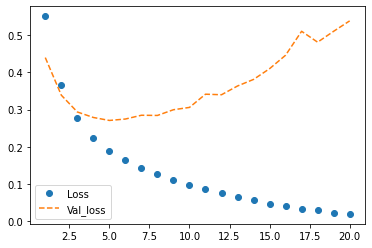

In [ ]:
his_dic2 = Less_model.history
epoch=range(1,21)
plt.plot(epoch, his_dic2["loss"], "o", label="Loss")
plt.plot(epoch, his_dic2["val_loss"], "--", label="Val_loss")
plt.legend()
plt.show()

**Regularizers**

The goal of regularization is to find a balance between the model's ability to fit the training data and its generalization ability, i.e. its ability to perform well on unseen data. By adding a penalty term, the model is forced to find a simpler representation of the data that still captures the important patterns in the data while avoiding overfitting.

In [ ]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(16, activation="relu", input_shape = (10000,), kernel_regularizer=regularizers.l2(0.001)))
reg_model.add(layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
reg_model.add(layers.Dense(1, activation="sigmoid"))

reg_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

In [ ]:
Reg_model = reg_model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_split=0.3)

Epoch 1/20
35/35 [==============================] - 2s 28ms/step - loss: 0.5394 - accuracy: 0.8091 - val_loss: 0.4176 - val_accuracy: 0.8760
Epoch 2/20
35/35 [==============================] - 1s 18ms/step - loss: 0.3537 - accuracy: 0.8987 - val_loss: 0.3461 - val_accuracy: 0.8885
Epoch 3/20
35/35 [==============================] - 1s 19ms/step - loss: 0.2954 - accuracy: 0.9153 - val_loss: 0.3459 - val_accuracy: 0.8797
Epoch 4/20
35/35 [==============================] - 1s 19ms/step - loss: 0.2647 - accuracy: 0.9262 - val_loss: 0.3724 - val_accuracy: 0.8728
Epoch 5/20
35/35 [==============================] - 1s 19ms/step - loss: 0.2457 - accuracy: 0.9349 - val_loss: 0.3705 - val_accuracy: 0.8741
Epoch 6/20
35/35 [==============================] - 1s 19ms/step - loss: 0.2326 - accuracy: 0.9397 - val_loss: 0.3329 - val_accuracy: 0.8872
Epoch 7/20
35/35 [==============================] - 1s 19ms/step - loss: 0.2239 - accuracy: 0.9447 - val_loss: 0.3393 - val_accuracy: 0.8859
Epoch 8/20
35

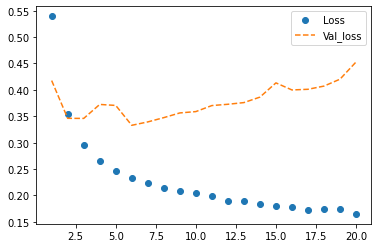

In [ ]:
his_dic3 = Reg_model.history
epoch=range(1,21)
plt.plot(epoch, his_dic3["loss"], "o", label="Loss")
plt.plot(epoch, his_dic3["val_loss"], "--", label="Val_loss")
plt.legend()
plt.show()

**Dropout** 

Dropout is a regularization technique used in neural networks to reduce overfitting. It works by randomly dropping out (i.e., setting to zero) some of the neurons during each iteration of training, effectively training multiple sub-models at once. By dropping out neurons, the model is prevented from relying too heavily on any single neuron's output, which can reduce overfitting and lead to improved generalization.

In [ ]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(16, activation="relu", input_shape = (10000,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(16, activation="relu"))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(1, activation="sigmoid"))

drop_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

In [ ]:
Drop_model = drop_model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_split=0.3)

Epoch 1/20
35/35 [==============================] - 2s 30ms/step - loss: 0.6232 - accuracy: 0.6487 - val_loss: 0.4963 - val_accuracy: 0.8537
Epoch 2/20
35/35 [==============================] - 1s 18ms/step - loss: 0.4974 - accuracy: 0.7663 - val_loss: 0.3826 - val_accuracy: 0.8781
Epoch 3/20
35/35 [==============================] - 1s 19ms/step - loss: 0.4167 - accuracy: 0.8220 - val_loss: 0.3234 - val_accuracy: 0.8855
Epoch 4/20
35/35 [==============================] - 1s 19ms/step - loss: 0.3541 - accuracy: 0.8575 - val_loss: 0.2834 - val_accuracy: 0.8920
Epoch 5/20
35/35 [==============================] - 1s 19ms/step - loss: 0.3156 - accuracy: 0.8813 - val_loss: 0.2738 - val_accuracy: 0.8940
Epoch 6/20
35/35 [==============================] - 1s 19ms/step - loss: 0.2788 - accuracy: 0.8983 - val_loss: 0.2672 - val_accuracy: 0.8945
Epoch 7/20
35/35 [==============================] - 1s 19ms/step - loss: 0.2498 - accuracy: 0.9091 - val_loss: 0.2732 - val_accuracy: 0.8951
Epoch 8/20
35

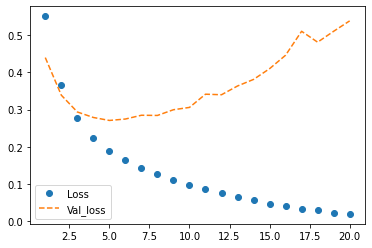

In [ ]:
his_dic4 = Drop_model.history
epoch=range(1,21)
plt.plot(epoch, his_dic2["loss"], "o", label="Loss")
plt.plot(epoch, his_dic2["val_loss"], "--", label="Val_loss")
plt.legend()
plt.show()

# All techniques in a single model

In [ ]:
full_model = models.Sequential()
full_model.add(layers.Dense(16, activation="relu", input_shape = (10000,), kernel_regularizer=regularizers.l2(0.001)))
full_model.add(layers.Dropout(0.5))
full_model.add(layers.Dense(8, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
full_model.add(layers.Dropout(0.5))
full_model.add(layers.Dense(1, activation="sigmoid"))

full_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

In [ ]:
Full_model = full_model.fit(x_train, y_train,
                    epochs = 50,
                    batch_size=512,
                    validation_split=0.3)

Epoch 1/50
35/35 [==============================] - 2s 31ms/step - loss: 0.6577 - accuracy: 0.6471 - val_loss: 0.5614 - val_accuracy: 0.7797
Epoch 2/50
35/35 [==============================] - 1s 27ms/step - loss: 0.5484 - accuracy: 0.7669 - val_loss: 0.4612 - val_accuracy: 0.8771
Epoch 3/50
35/35 [==============================] - 1s 28ms/step - loss: 0.4814 - accuracy: 0.8186 - val_loss: 0.3957 - val_accuracy: 0.8792
Epoch 4/50
35/35 [==============================] - 1s 27ms/step - loss: 0.4333 - accuracy: 0.8459 - val_loss: 0.3644 - val_accuracy: 0.8867
Epoch 5/50
35/35 [==============================] - 1s 28ms/step - loss: 0.4063 - accuracy: 0.8652 - val_loss: 0.3482 - val_accuracy: 0.8872
Epoch 6/50
35/35 [==============================] - 1s 22ms/step - loss: 0.3793 - accuracy: 0.8777 - val_loss: 0.3388 - val_accuracy: 0.8877
Epoch 7/50
35/35 [==============================] - 1s 19ms/step - loss: 0.3598 - accuracy: 0.8932 - val_loss: 0.3304 - val_accuracy: 0.8880
Epoch 8/50
35

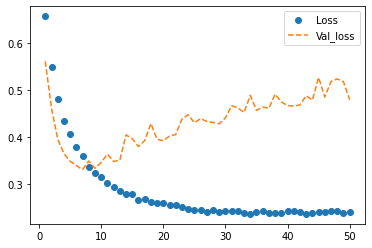

In [ ]:
his_dic5 = Full_model.history
epoch=range(1,51)
plt.plot(epoch, his_dic5["loss"], "o", label="Loss")
plt.plot(epoch, his_dic5["val_loss"], "--", label="Val_loss")
plt.legend()
plt.show()